In [2]:
from kg_utils import *
from tag_sentence import *
from nltk import ngrams
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
accr_location = "se_data/acronyms.txt"
definition_location = "se_data/definitions.txt"

In [4]:
source, target, relations, entities = create_relations_from_accronym_def(accr_location, definition_location)

In [5]:
kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [6]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

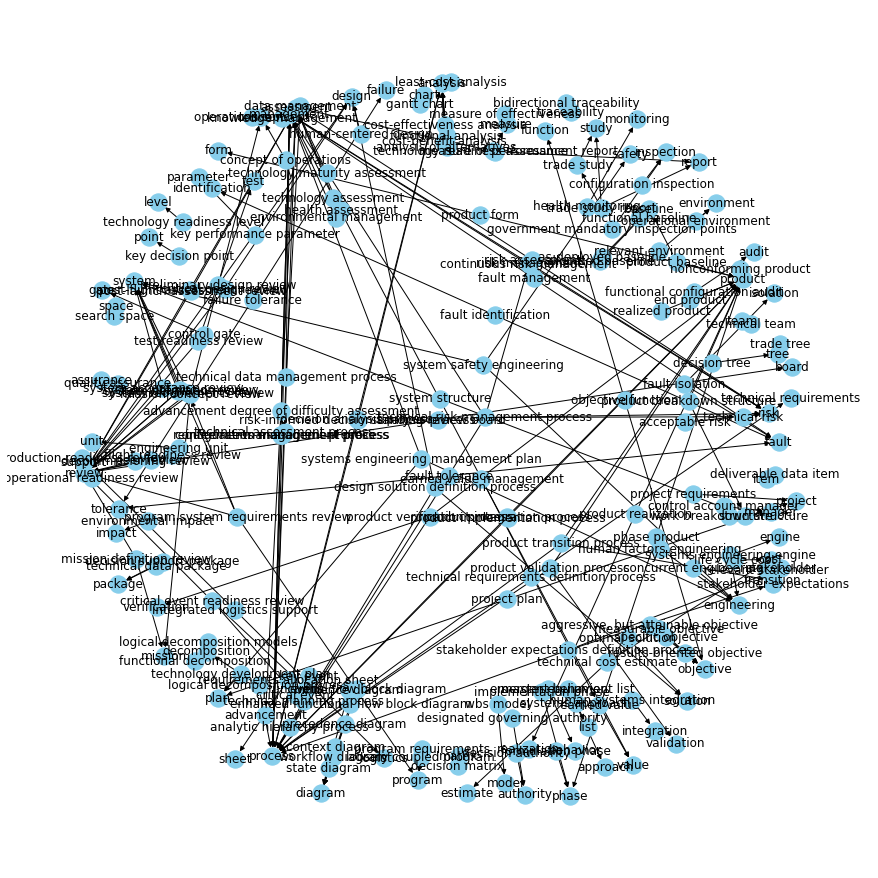

In [7]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

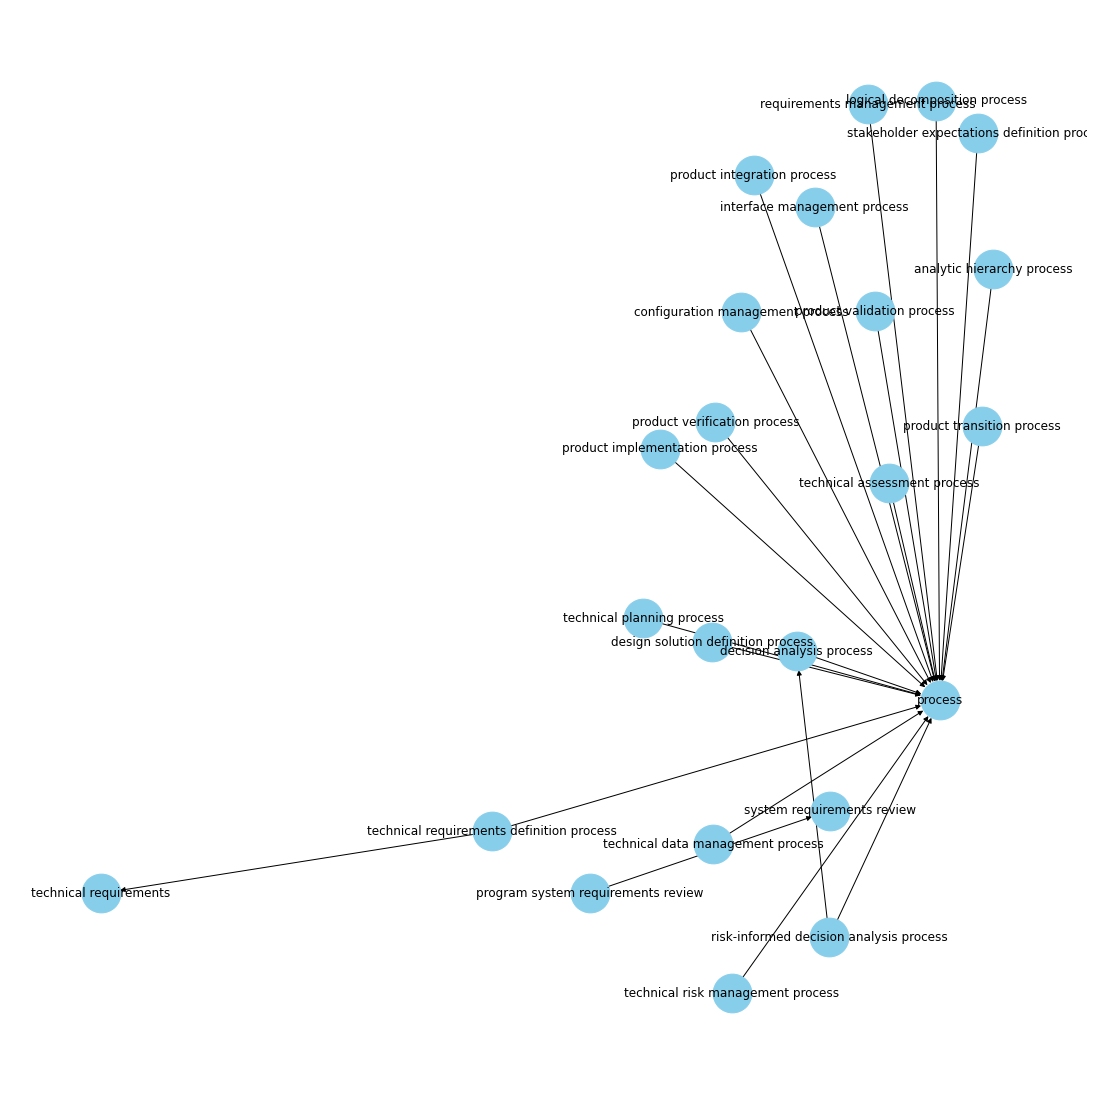

In [8]:
s = []
t = []
r = []
for index in range(len(target)):
    if "requirement" in target[index] or "process" in target[index]:
        s.append(source[index])
        t.append(target[index])
        r.append(relations[index])

kg_df = pd.DataFrame({'source':s, 'target':t, 'edge':r})
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(15,15))

pos = nx.spring_layout(G)
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue',node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [9]:
d = create_acronym_dict_inverse(accr_location)

In [10]:
for key,val in d.items():
    key = re.sub(r'\( ', r'(',key)
    key = re.sub(r' \)', r')',key)
    if key in entities:
        source.append(val)
        target.append(key)
        relations.append('stands-for')

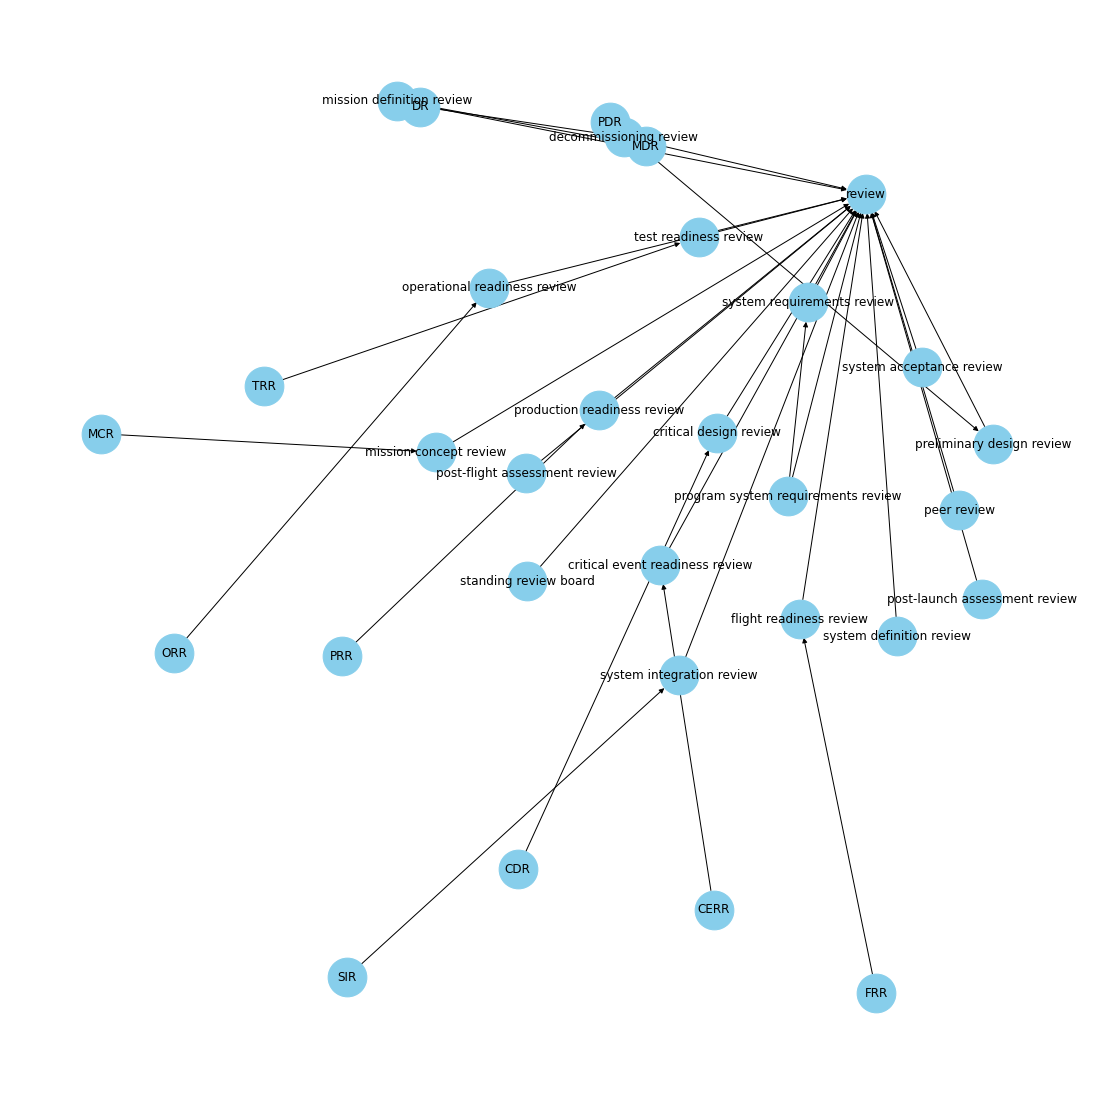

In [11]:
s = []
t = []
r = []
for index in range(len(target)):
    if "review" in target[index]:
        s.append(source[index])
        t.append(target[index])
        r.append(relations[index])

kg_df = pd.DataFrame({'source':s, 'target':t, 'edge':r})
# create a directed-graph from a dataframe

G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(15,15))

pos = nx.spring_layout(G)
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue',node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()